## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = merge_table_df["Mouse ID"].count()

number_of_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_table_df.loc[merge_table_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_table_df = merge_table_df.loc[merge_table_df['Mouse ID'] != "g989"]
merge_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_merge_table_df["Mouse ID"].count()

clean_number_of_mice

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summarystats = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen").count())
summarystats["Mean"] = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(clean_merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})
summarystats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line = clean_merge_table_df.groupby('Drug Regimen')
summary_stats_table_2 = single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

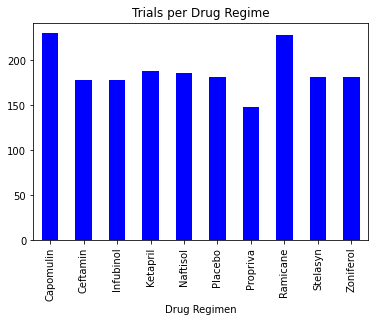

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
datapoints = summarystats[["Trials"]]
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

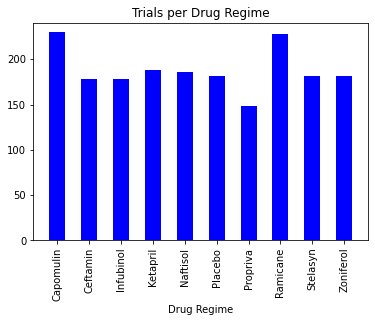

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(clean_merge_table_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()
# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,922
1,Male,958


<AxesSubplot:ylabel='Count'>

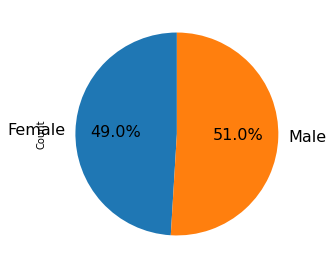

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (clean_merge_table_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count


[922, 958]

In [15]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x7fb0fe206040>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Females'),
  Text(0.7320888280116863, 0.8210030133321532, 'Males')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

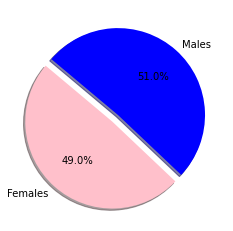

In [16]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [18]:
# Start by getting the last (greatest) timepoint for each mouse
sorted_df = clean_merge_table_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = clean_merge_table_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
 

In [21]:
capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [22]:
capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [23]:
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


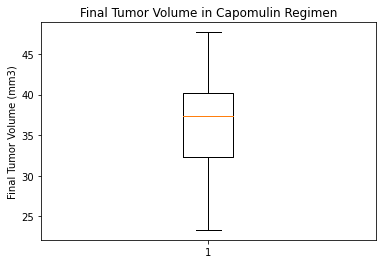

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

In [25]:
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [26]:
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [27]:
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


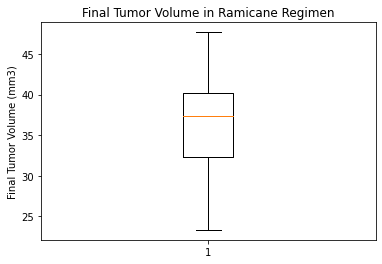

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

In [29]:
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
infu_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [30]:
infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [31]:
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


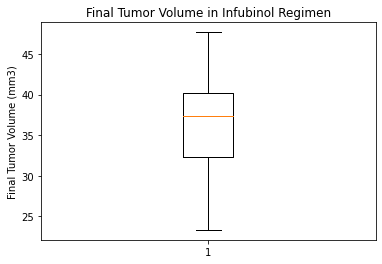

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

In [33]:
ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
ceft_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [34]:
ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
ceft_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [35]:
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


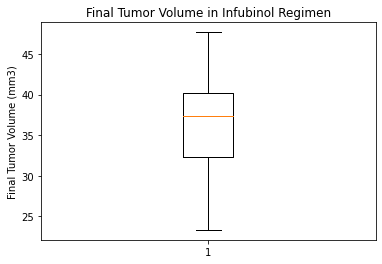

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_merge_table_df.loc[clean_merge_table_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [38]:
# Grab data from one mouse
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

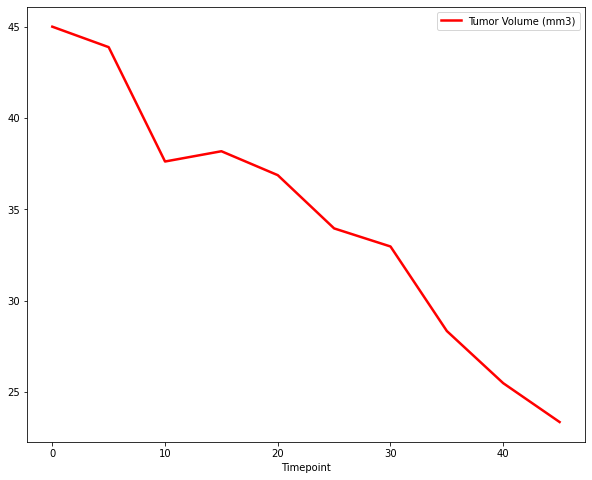

In [39]:
#Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [41]:
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [42]:
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [43]:
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [44]:
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


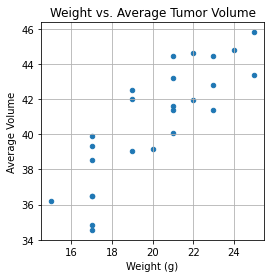

In [45]:
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [46]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,0]
avg_tumor_volume = avg_capo.iloc[:,1]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()